Dataset Loaded Successfully
         date        load  temperature   humidity  windspeed  holiday_flag
0  2018-01-01  223.463953    10.021757  53.136867   5.671033             0
1  2018-01-02  199.604893    11.505414  58.687116   4.720127             0
2  2018-01-03  229.091921    15.057753  54.056516   4.821892             0
3  2018-01-04  222.559232    13.110624  57.184633   5.693422             0
4  2018-01-05  230.732046    14.803696  51.816050   4.774056             0


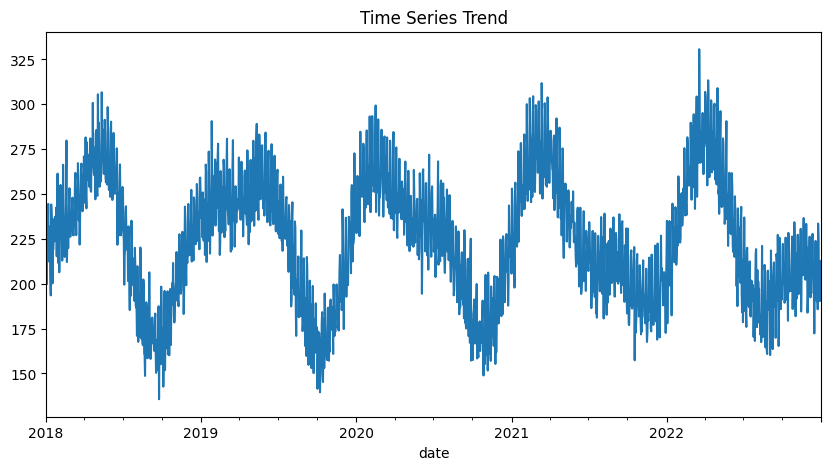

Training Samples: 1436 | Testing Samples: 360


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,009 (199.25 KB)

 Trainable params: 51,009 (199.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0410 - val_loss: 0.0075
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0104 - val_loss: 0.0065
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0101 - val_loss: 0.0064
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0093 - val_loss: 0.0061
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0085 - val_loss: 0.0067
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0086 - val_loss: 0.0054
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0070 - val_loss: 0.0062
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0083 - val_loss: 0.0059
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0070 - val_loss: 0.0056
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0066 - val_loss: 0.0052
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step

Model Performance:
MAE: 10.9140
RMSE: 13.7351


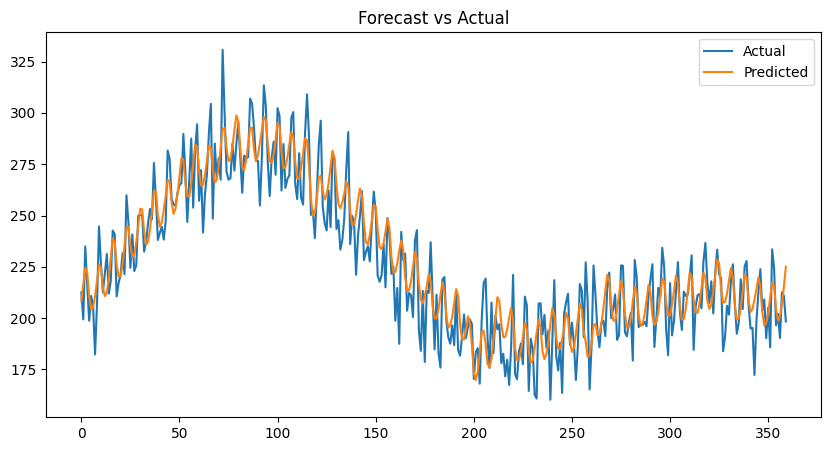

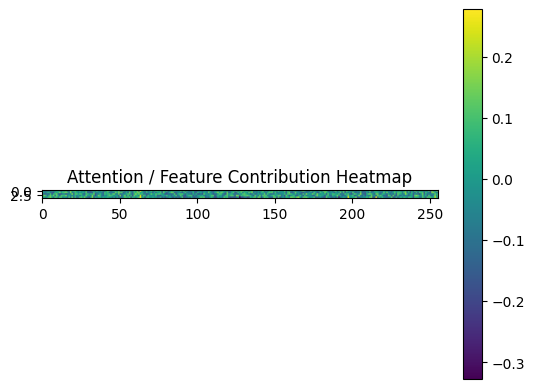


Project Completed!


In [ ]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

# 2. LOAD DATA
file_path = "/content/time_series_dataset.csv"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully")
print(df.head())

# 3. CONVERT DATE COLUMN TO DATETIME
df['date'] = pd.to_datetime(df['date'], errors='coerce') # Corrected 'Date' to 'date'
df = df.set_index('date') # Corrected 'Date' to 'date'

# 4. VISUALIZE MAIN TARGET VARIABLE
target_column = df.columns[0]
df[target_column].plot(figsize=(10,5), title="Time Series Trend")
plt.show()

# 5. NORMALIZATION
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 6. CREATE SEQUENCE WINDOWS
def create_dataset(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window][0])  # Predict first column
    return np.array(X), np.array(y)

window_size = 30
X, y = create_dataset(scaled_data, window_size)

# Train-Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training Samples: {len(X_train)} | Testing Samples: {len(X_test)}")

# 7. BUILD LSTM MODEL
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, X.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# 8. TRAIN THE MODEL
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 9. PREDICTION & INVERSE TRANSFORM
predictions = model.predict(X_test)

# Expand dimensions for inverse scaling
pred_full = np.zeros((len(predictions), scaled_data.shape[1]))
pred_full[:, 0] = predictions[:, 0]
predicted_values = scaler.inverse_transform(pred_full)[:, 0]

# Convert real values back
real_full = np.zeros((len(y_test), scaled_data.shape[1]))
real_full[:, 0] = y_test
real_values = scaler.inverse_transform(real_full)[:, 0]

# 10. EVALUATION
mae = mean_absolute_error(real_values, predicted_values)
rmse = sqrt(mean_squared_error(real_values, predicted_values))

print(f"\nModel Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# 11. VISUALIZE FORECAST
plt.figure(figsize=(10,5))
plt.plot(real_values, label="Actual")
plt.plot(predicted_values, label="Predicted")
plt.legend()
plt.title("Forecast vs Actual")
plt.show()

# 12. SIMPLE EXPLAINABILITY USING ATTENTION (Heatmap)

# Extract last hidden layer outputs
attention_weights = model.layers[0].get_weights()[0]
plt.imshow(attention_weights, cmap='viridis')
plt.title("Attention / Feature Contribution Heatmap")
plt.colorbar()
plt.show()

print("\nProject Completed!")